<a href="https://colab.research.google.com/github/P-Dammy/Feed-Forward-Neural-Network-with-Python/blob/main/Feed_forward_Neural_Network_for_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing necessary libaries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the iris dataset directly as a DataFrame
iris = sns.load_dataset('iris')

In [4]:
# Quick summary of the dataset
print(iris.head())  # First 5 rows
print(iris.info())  # Data types and non-null counts
print(iris.describe())  # Statistical summary

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333  

In [5]:
# Check for missing values
print("Missing values:\n", iris.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
# Distribution of each species
print("Species distribution:\n", iris['species'].value_counts())

Species distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


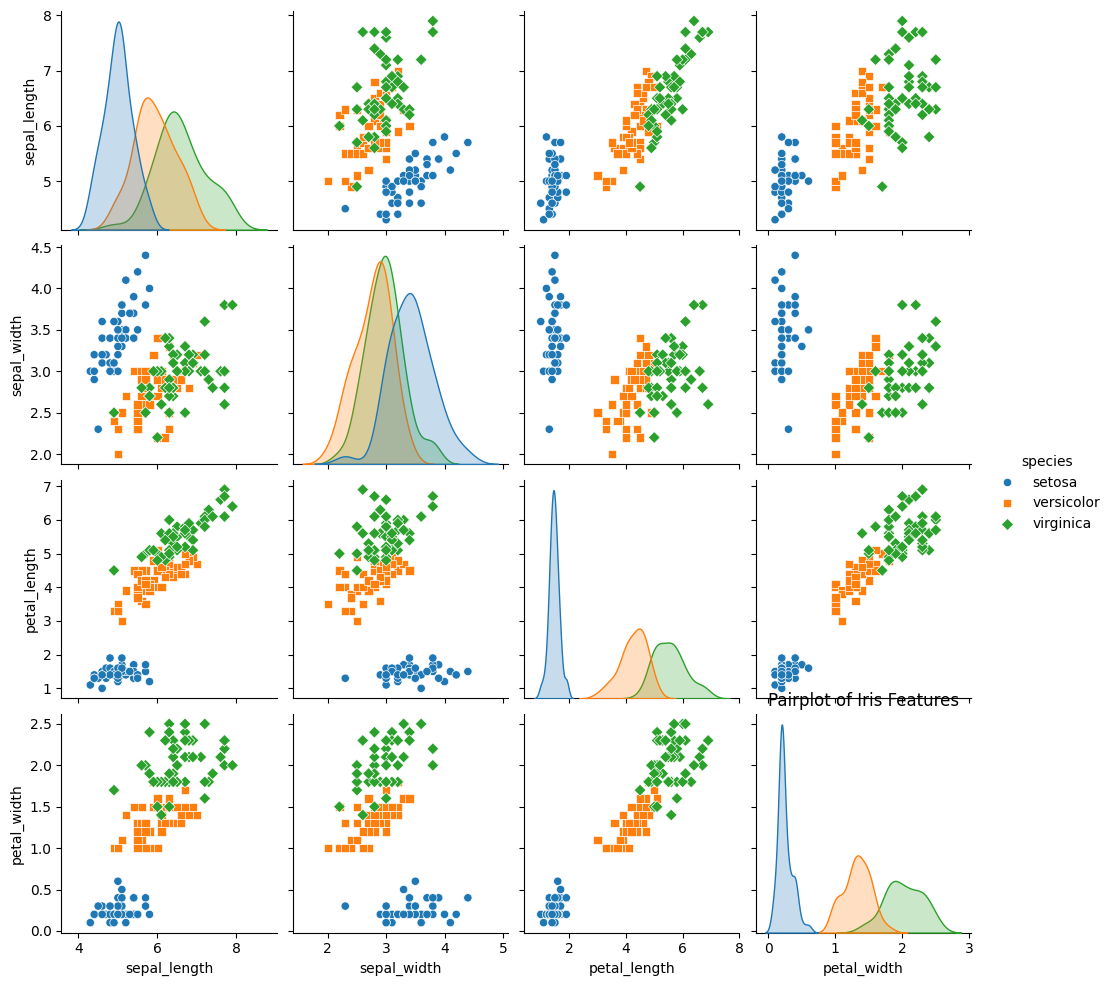

In [7]:
# Pairplot to visualize relationships between features and species
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.title('Pairplot of Iris Features')
plt.show()

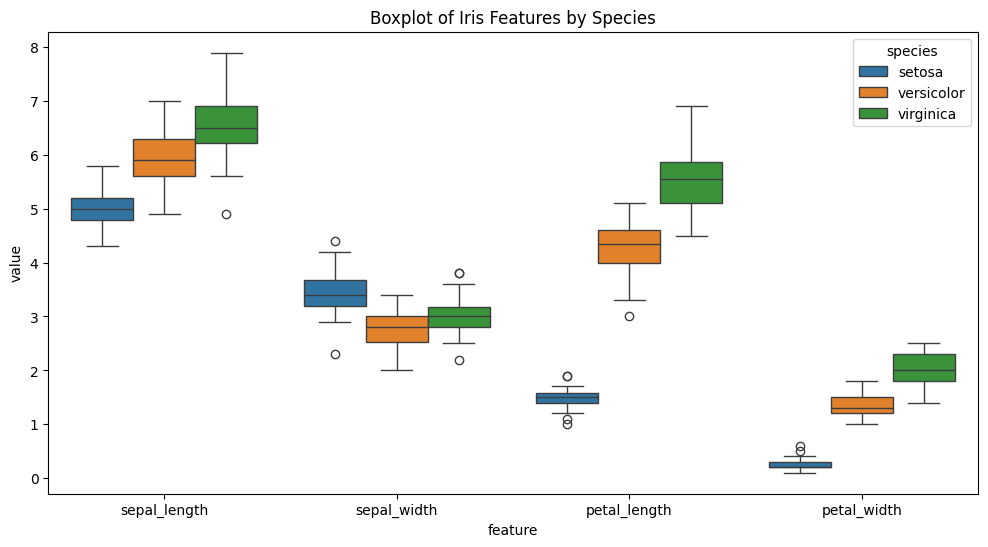

In [8]:
# Boxplots to visualize feature distributions by species
plt.figure(figsize=(12, 6))
iris_melted = iris.melt(id_vars="species", var_name="feature", value_name="value")
sns.boxplot(x='feature', y='value', hue='species', data=iris_melted)
plt.title('Boxplot of Iris Features by Species')
plt.show()

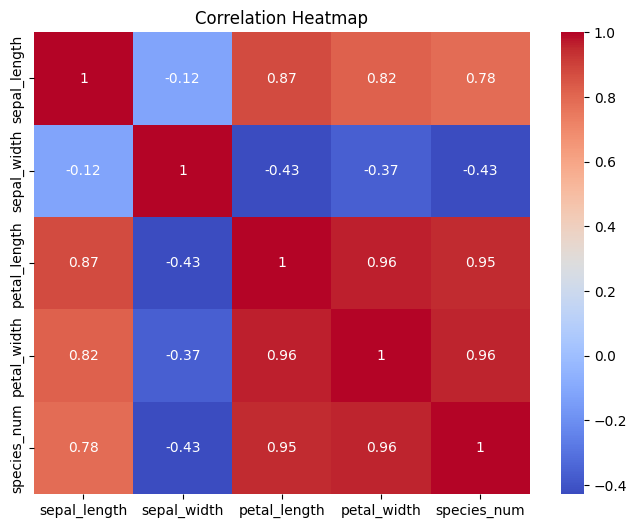

In [9]:
# Correlation heatmap to show relationships between numerical features
iris['species_num'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
plt.figure(figsize=(8,6))
sns.heatmap(iris.drop('species', axis = 1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Loading Iris dataset as scikit-learn bunch object
iris = load_iris()
X, y = iris.data, iris.target

In [11]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [12]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
# Build the Feedforward Neural Network (FNN)
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(10, activation='relu'))  # Another hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes for Iris)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=5)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2227 - loss: 1.3023 - val_accuracy: 0.3667 - val_loss: 1.2489
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2805 - loss: 1.1533 - val_accuracy: 0.4333 - val_loss: 1.1628
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5050 - loss: 1.0714 - val_accuracy: 0.5000 - val_loss: 1.0835
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5501 - loss: 1.0508 - val_accuracy: 0.5667 - val_loss: 1.0092
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4724 - loss: 0.9854 - val_accuracy: 0.6667 - val_loss: 0.9295
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6194 - loss: 0.9440 - val_accuracy: 0.7667 - val_loss: 0.8583
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6691 - loss: 0.8657 - val_accuracy: 0.8000 - val_loss: 0.7869
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 0.8381 - val_accuracy: 0.8667 - val_loss

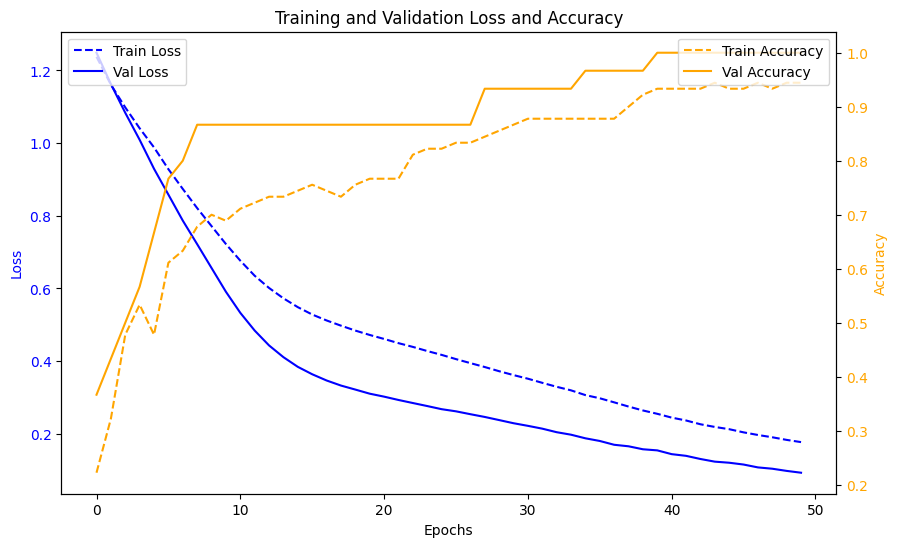

In [16]:
# Plotting the training and validation loss and accuracy

import matplotlib.pyplot as plt

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot loss on the left y-axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='blue')
ax1.plot(training_history.history['loss'], label='Train Loss', color='blue', linestyle='--')
ax1.plot(training_history.history['val_loss'], label='Val Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for accuracy
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Accuracy', color='orange')  # we already handled the x-label with ax1
ax2.plot(training_history.history['accuracy'], label='Train Accuracy', color='orange', linestyle='--')
ax2.plot(training_history.history['val_accuracy'], label='Val Accuracy', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends to each axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title
plt.title('Training and Validation Loss and Accuracy')

# Show the plot
plt.show()


In [17]:
# Evaluate the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train Accuracy:", train_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.9410 - loss: 0.1752
Train Accuracy: 0.9444444179534912


In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1667
Test Accuracy: 1.0


In [20]:
# Evaluate the model on the Validation set
Val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0930
Validation Accuracy: 1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


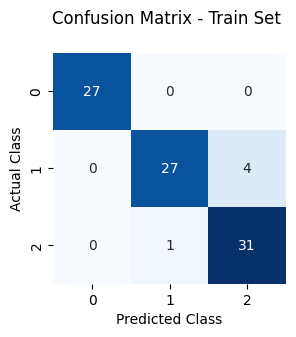

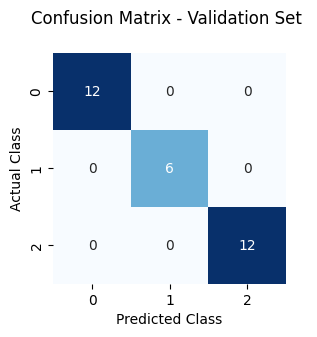

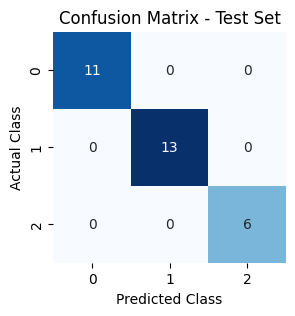

In [26]:

# Predict classes for each dataset
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion matrices for train, validation, and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_train, "Confusion Matrix - Train Set \n")
plot_confusion_matrix(cm_val, "Confusion Matrix - Validation Set \n")
plot_confusion_matrix(cm_test, "Confusion Matrix - Test Set")